# My Machine Learning Knowledge base

## Machine Learning concepts

## Contents:

0. Importing tools
1. Loading the data
2. Numpy
3. Pandas
4. Matplotlib.pyplot
5. Scikit-learn

## 0. Importing the tools

In [1]:
# EDA tools (Exploratory data analysys)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Make the plots visible inside the notebook
%matplotlib inline

# Model evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Import a toy dataset to work with
from sklearn.datasets import load_iris

## 1. Loading the data

In [2]:
# Load the data
iris_data = load_iris()

The `data` variable contains more than we need so we need to extract the data and feature_names from it

In [3]:
# Create a pandas Dataframe
df = pd.DataFrame(data=iris_data.data,
                 columns=iris_data.feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
# Add target to our df
df["target"] = iris_data.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

Later on we can use the `iris_data.target_names` to get labels for the predictions

## 2. Pandas

## 3. NumPy

## 4. Ploting the data: Matplotlib.pyplot 

#### Useful links 
* A list of all matplotlib fonts: https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
* A Matplotlib Crash Course: https://www.youtube.com/watch?v=3Xc3CA655Y4

`fontdict` is a parameter to change the setings of the font

### 4.1 Graphs

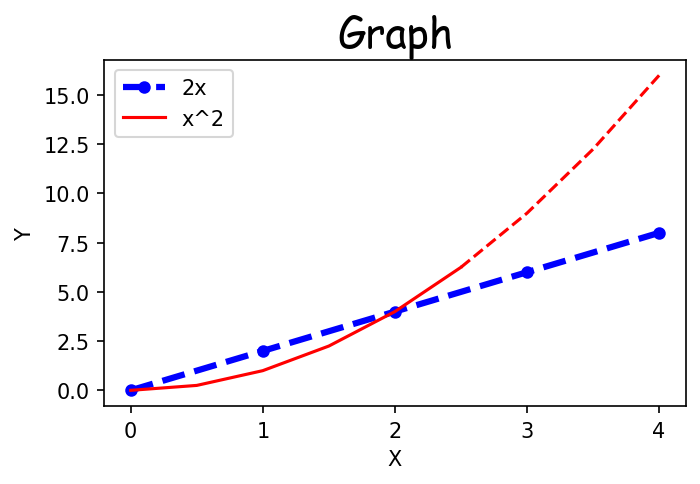

In [5]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize the graph
# dpi is pixels per inch, so the higher the dpi the more resolution you get
plt.figure(figsize=(5,3), dpi=150)

# Plot the first line
plt.plot(x,y, 
         label='2x', 
         color="blue", # the color of the graph 
         linewidth=3, # how thick is the line
         linestyle="--", # How the line looks
         marker=".", # Marking the values using dots
         markersize=10, # How big are the markers
         markeredgecolor="blue") # The color of the marker's bound

# Shorthand notation (for creating graphs quickly)
# [color][marker][line]
# plt.plot(x,y, 'r.--', label='2x')
# From this we get a red -- line with dot markers

# Add second line
x2 = np.arange(0,4.5,0.5)
plt.plot(x2[:6], x2[:6]**2, 'r-', label="x^2")
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title
plt.title("Graph", fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# Add a title to the axis
plt.xlabel("X")
plt.ylabel("Y")

# Changing the ticks (the values on the scale)
plt.xticks([0,1,2,3,4])
#plt.yticks([0,2,4,6,8])

# Adding a legend
plt.legend()

# Saving a graph (you can pass the dpi to get a higher resolution image)
plt.savefig('mygraph.png', dpi=300)

# This is the correct way to show the graph and it also allows you to put ; and just forget about it
plt.show();

### 4.2 Bar chart

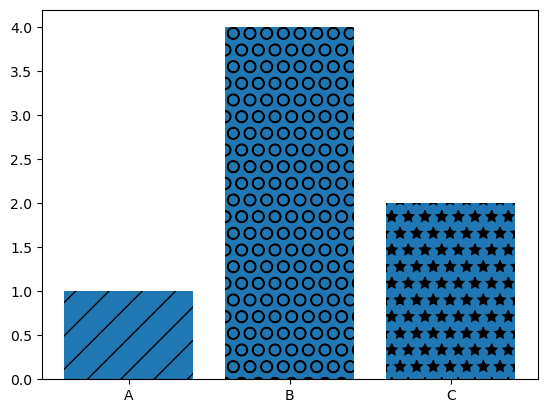

<Figure size 600x400 with 0 Axes>

In [6]:
labels = ['A', 'B', 'C']
values = [1,4,2]

# Seting up the bar chart
bars = plt.bar(labels, values)

# Seting the patterns in bars manualy
# bars[0].set_hatch('/')
# bars[1].set_hatch('.')
# bars[2].set_hatch('*')

# Seting the patters using a loop
patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.figure(figsize=(6,4))

plt.show();

In [7]:
gas = pd.read_csv("gas_prices.csv")
gas.head()

Year  Australia  Canada  France  Germany  Italy  Japan  Mexico  \
0  1990        NaN    1.87    3.63     2.65   4.59   3.16    1.00   
1  1991       1.96    1.92    3.45     2.90   4.50   3.46    1.30   
2  1992       1.89    1.73    3.56     3.27   4.53   3.58    1.50   
3  1993       1.73    1.57    3.41     3.07   3.68   4.16    1.56   
4  1994       1.84    1.45    3.59     3.52   3.70   4.36    1.48   

   South Korea    UK   USA  
0         2.05  2.82  1.16  
1         2.49  3.01  1.14  
2         2.65  3.06  1.13  
3         2.88  2.84  1.11  
4         2.87  2.99  1.11

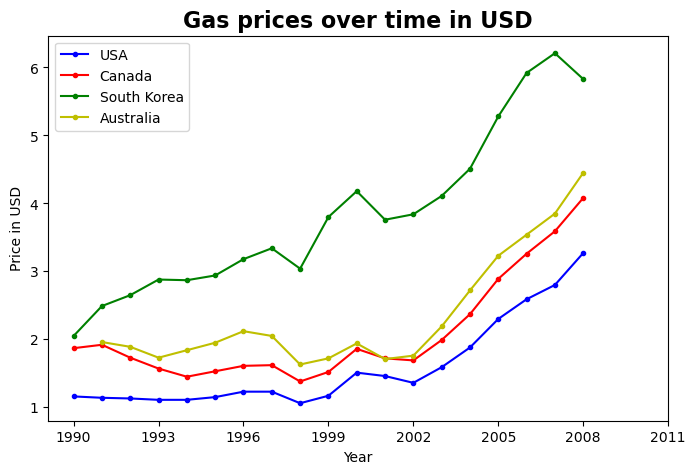

In [8]:
plt.figure(figsize=(8,5))
plt.title("Gas prices over time in USD", fontdict={'fontweight': 'bold', 'fontsize': 16})

plt.plot(gas.Year, gas.USA, 'b.-', label="USA")
plt.plot(gas.Year, gas.Canada, 'r.-', label="Canada")
plt.plot(gas.Year, gas["South Korea"], 'g.-', label="South Korea")
plt.plot(gas.Year, gas.Australia, 'y.-', label="Australia")

plt.xlabel("Year")
plt.ylabel("Price in USD")

# This syntax [::3] means we start at 0 end at the end and we want every third element
# Then we move years to a list and add 2011 (to plot predictoins for example)
plt.xticks(gas.Year[::3].tolist()+[2011])

plt.legend()

plt.savefig('Gas_price_figure.png', dpi=300)

plt.show();

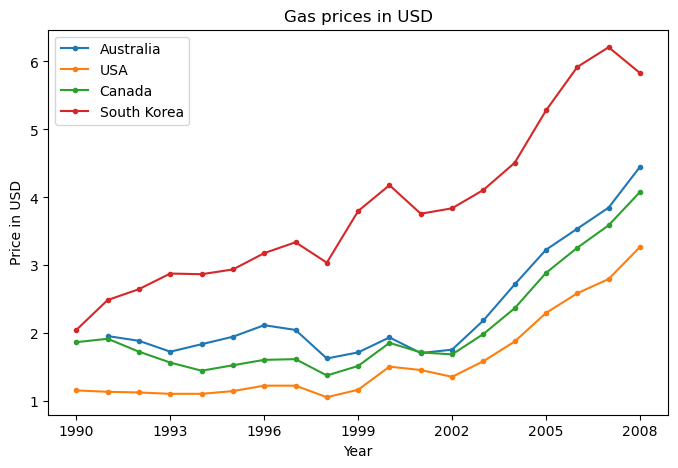

In [9]:
# Iterative approach
plt.figure(figsize=(8,5))
plt.title("Gas prices in USD")

countries_to_look_at = ["Australia", "USA", "Canada", "South Korea"]
for country in countries_to_look_at:
    plt.plot(gas.Year, gas[country], marker='.', label=country)
    
plt.xticks(gas.Year[::3])
plt.xlabel("Year")
plt.ylabel("Price in USD")

plt.legend()
plt.show();

In [10]:
fifa = pd.read_csv("fifa_data.csv")
fifa.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

### 4.3 Histogram

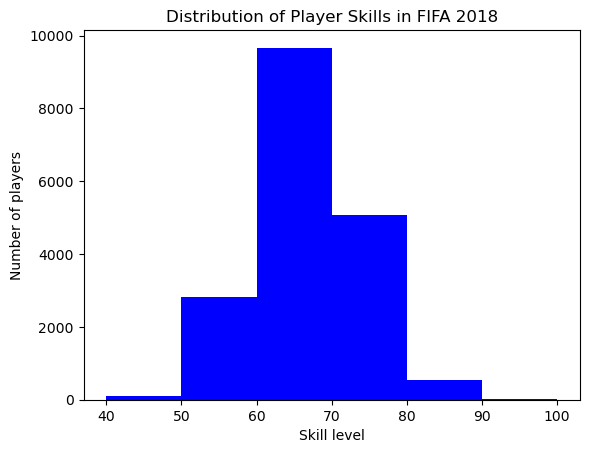

In [16]:
bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color='b')

plt.xticks(bins)

plt.ylabel("Number of players")
plt.xlabel("Skill level")
plt.title("Distribution of Player Skills in FIFA 2018")

plt.show();

### 4.4 Pie Charts

#### 4.4.1 Simple Pie Chart

In [17]:
fifa["Preferred Foot"]

0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object

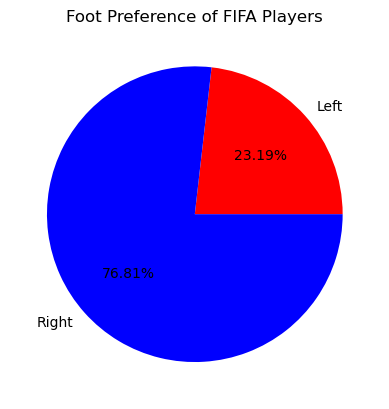

In [25]:
# Loc is used to localise all the rows with the specified parameter (I think)
left = fifa.loc[fifa['Preferred Foot']=='Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot']=="Right"].count()[0]

labels = ["Left", "Right"]
colours = ['r', 'b']

# autopct parameter is autoprocentage (shows the % with 2 decimal places) and addign %% means we want to display the % character
plt.pie([left, right], labels= labels, colors=colours, autopct='%.2f%%')

plt.title("Foot Preference of FIFA Players")
plt.show();

#### 4.4.2 More complex pie chart

In [27]:
fifa.Weight

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [30]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]
fifa.Weight

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [34]:
light_players = fifa.loc[(fifa.Weight < 125)].count()[0]
# When we have two conditions in the loc method we use the following syntax
light_medium_players = fifa.loc[(fifa.Weight >=125) & (fifa.Weight < 150)].count()[0]
medium_players = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight <175)].count()[0]
medium_heavy_players = fifa.loc[(fifa.Weight>=175) & (fifa.Weight<200)].count()[0]
heavy_players = fifa.loc[fifa.Weight>=200].count()[0]
print(light_players, light_medium_players, medium_players, medium_heavy_players, heavy_players)

weights = [light_players, light_medium_players, medium_players, medium_heavy_players, heavy_players]

41 2290 10876 4583 369


Insted of manually typing the colours you can simply use a style using the `plt.style.use()` method. Here we pass the `'ggplot'` style. 

**NOTE:** The style method needs to be applied first, in other cases it doesn't work. It also works for all the charts onwards, so keep that in mind.

`pctdistance` parameter in `plt.pie()` modifies how far from the center are the % values on the chart. The values range from `0-1` and if you go over `1` the values will be outside the chart. 

`explode` parameter "breaks" the graph apart 

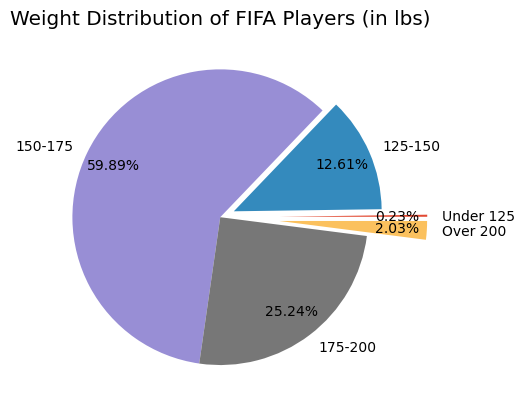

In [44]:
plt.style.use('ggplot')
labels = ["Under 125", "125-150", "150-175", "175-200", "Over 200"]
explode = (0.4, 0.1, 0, 0, 0.4)

plt.title("Weight Distribution of FIFA Players (in lbs)")

plt.pie(weights, labels=labels, autopct='%.2f%%', pctdistance=0.8, explode=explode)
plt.show();

### 4.4 Box and whiskers chart

In [58]:
barcelona = fifa.loc[fifa.Club == "FC Barcelona"]["Overall"]
madrid = fifa.loc[fifa.Club=="Real Madrid"]["Overall"]
revs = fifa.loc[fifa.Club=="New England Revolution"]["Overall"]
lech = fifa.loc[fifa.Club=="Lech Poznań"]["Overall"]

**NOTE:** If you want to change the `facecolor` property you have to pass in the `patch_artist=True` parameter in `plt.boxplot`. Reason: unknow as of the time of making this notebook.

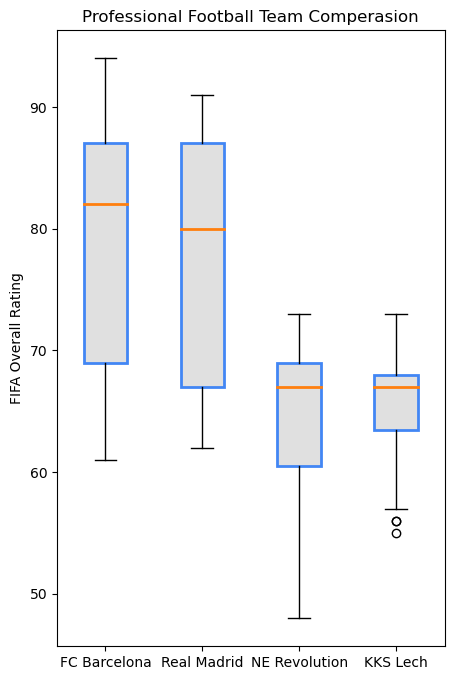

In [64]:
plt.style.use('default')

plt.figure(figsize=(5,8))

labels = ["FC Barcelona", "Real Madrid", "NE Revolution", "KKS Lech"]

boxes = plt.boxplot([barcelona, madrid, revs, lech], labels=labels, patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # Set edge color
    box.set(color="#4286f4", linewidth=2)
    # Change Fill color
    box.set(facecolor='#e0e0e0')

plt.title ("Professional Football Team Comperasion")
plt.ylabel("FIFA Overall Rating")

plt.show()